In [20]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import numba as nb
import cv2


In [21]:
def seq_with_plotting(pixelsMatrix,mask,grayLevels = 256):
    H,W = pixelsMatrix.shape
    size = H*W
    occurencies = [0.0 for _ in range(grayLevels)]
    occurencies_for_plot = [0.0 for _ in range(grayLevels)]
    pixels_in_mask_count = 0
    for row_id,row in enumerate(pixelsMatrix):
        for pixel_id,pixel in enumerate(row):
            if  mask[row_id][pixel_id]!=0:
                occurencies[pixel]+=1 #histogram pikseli, które w masce nie są czarne
                pixels_in_mask_count+=1 #zliczam piksele objęte maską

            occurencies_for_plot[pixel]+=1 #histogram całego obrazka, tylko dla wykresów

    print(sum(occurencies),pixels_in_mask_count)
    cdf = [sum(occurencies[:i+1]) for i in range(grayLevels)] #skumulowana funkcja rozkładu
    cdfmin = next((x for x in cdf if x),-1) #pierwszy niezerowy element cdf

    #transformacja h wedlug wzoru z wikipedii
    h = [round((cdf[v]-cdfmin)/(pixels_in_mask_count-cdfmin) * (grayLevels-1)) for v in range(grayLevels)] 

    for row_id,row in enumerate(pixelsMatrix):
        for pixel_id,pixel in enumerate(row):
            if  mask[row_id][pixel_id] != 0: #piksel w masce nie jest czarny, wstawiam wartość z transformacji h
                pixelsMatrix[row_id][pixel_id] = h[pixel]
            else: #piksel jest czarny w masce, więc wstawiam czarny kolor 
                pixelsMatrix[row_id][pixel_id] = 0

            
    #Buduję histogram z wynikowego obrazka, tylko do wykresów
    occurrencies_equalized = [0.0 for _ in range(grayLevels)]
    for row_id,row in enumerate(pixelsMatrix):
        for pixel_id,pixel in enumerate(row):
                if mask[row_id][pixel_id] !=0:
                    occurrencies_equalized[pixel]+=1


    plt.bar(range(grayLevels),occurrencies_equalized,label = 'equalized',alpha=0.5)
    plt.bar(range(grayLevels),occurencies_for_plot,label = 'original',alpha=0.5)
    plt.legend()
    return Image.fromarray(pixelsMatrix),Image.fromarray(mask).convert('L')


In [22]:
@nb.jit(fastmath=True,nopython=True)
def generate_dummy_mask(matrix:np.ndarray,threshold = 150):
    mask = np.copy(matrix)
    return mask<threshold

In [23]:
EXAMPLE_IMAGE = 'data/600x400.png'

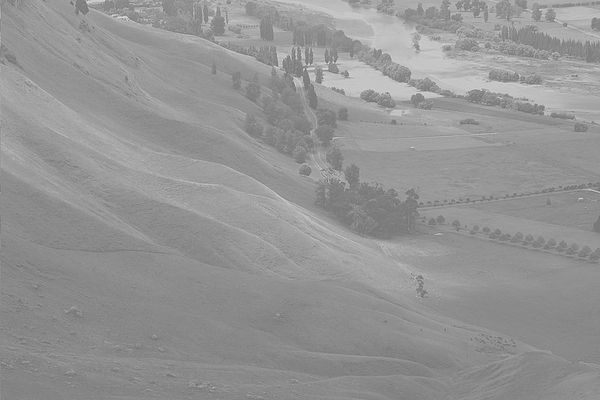

In [24]:
image = Image.open(EXAMPLE_IMAGE).convert('L')
image #obrazek przed przetwarzaniem

240000.0 240000


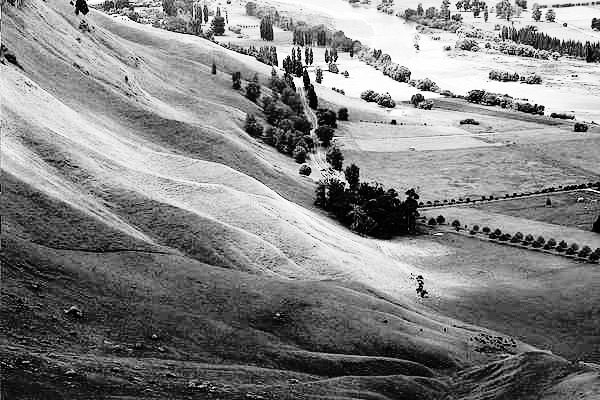

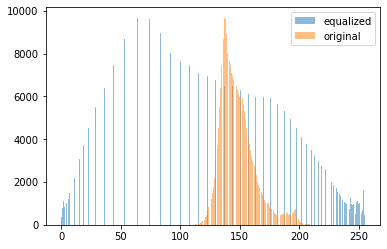

In [25]:
image = np.array(Image.open(EXAMPLE_IMAGE).convert('L'))
equalized_image,mask = seq_with_plotting(image,np.ones(image.shape)*255)
equalized_image


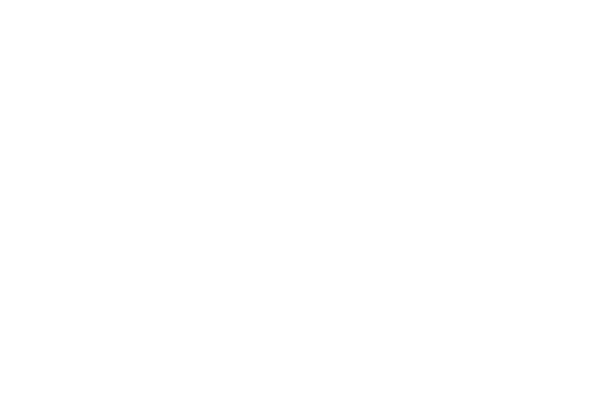

In [26]:
mask # biały obrazek

120000.0 120000


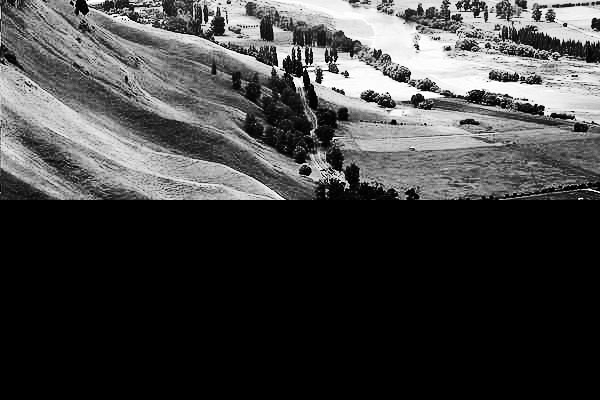

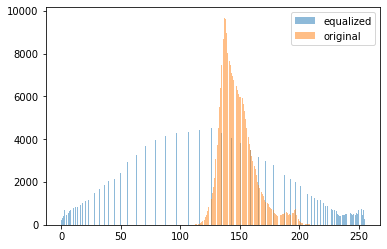

In [27]:
image = np.array(Image.open(EXAMPLE_IMAGE).convert('L'))
mask = np.zeros(image.shape)
for row_id,row in enumerate(mask[:len(mask)//2]):
    mask[row_id]=255

equalized_image, mask = seq_with_plotting(image,mask)
equalized_image

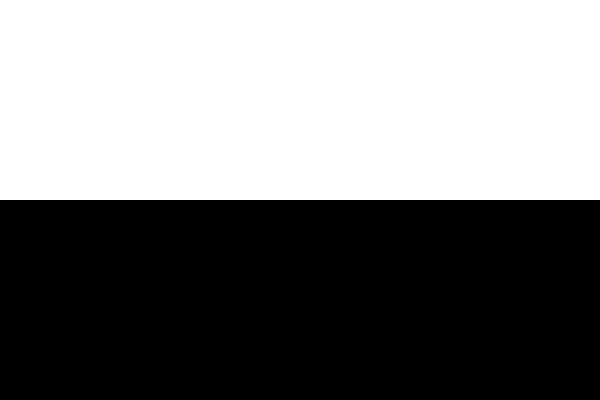

In [28]:
mask #pierwsze pół wysokości białe, drugie pół czarne

In [29]:
img_black = np.zeros(image.shape,np.uint8)

img_circle = cv2.circle(img_black,(img_black.shape[0]//2,img_black.shape[1]//2), img_black.shape[0]//3, 255,-1)

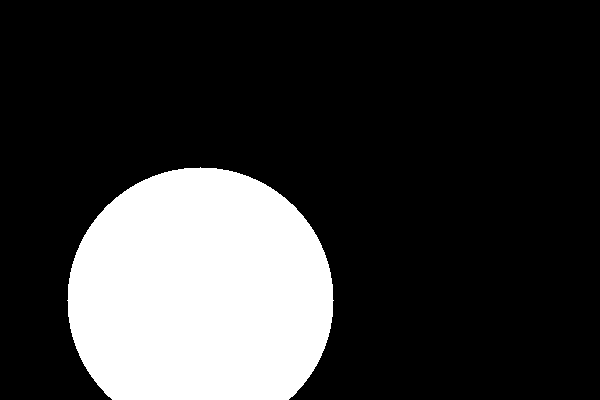

In [30]:
Image.fromarray(img_circle)

51507.0 51507


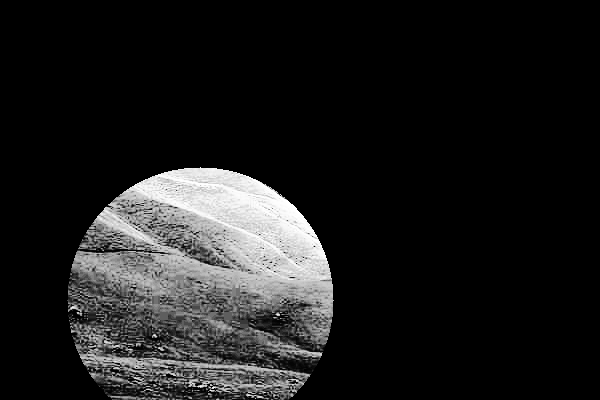

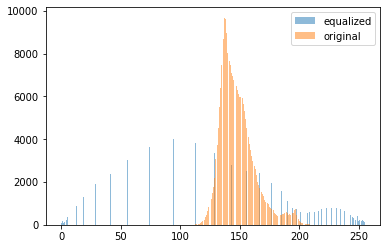

In [31]:
image = np.array(Image.open(EXAMPLE_IMAGE).convert('L'))

equalized_image, mask = seq_with_plotting(image,img_circle)
equalized_image

In [32]:
from cuda import parallel
from seq import sequential
image = np.array(Image.open(EXAMPLE_IMAGE).convert('L'))
mask = np.ones(image.shape)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   1   1   1   2   2   3   4
   6   7   9  11  15  19  23  29  36  44  53  64  74  83  92 100 108 115
 123 130 137 144 151 157 163 170 176 182 188 193 198 202 206 210 213 216
 219 222 225 227 229 231 232 234 235 236 238 239 240 241 241 242 243 243
 244 244 245 245 246 246 247 248 248 249 249 250 250 251 251 252 253 254
 254 254 254 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 25

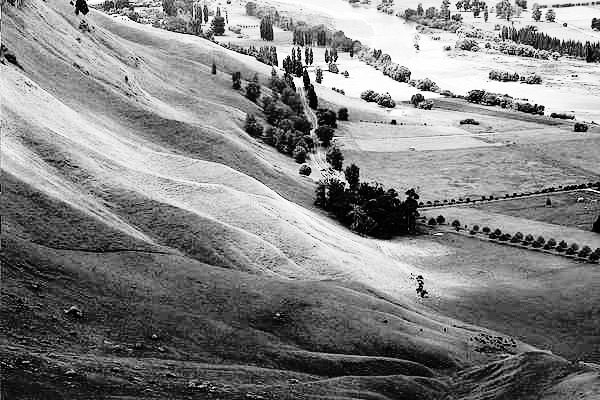

In [33]:
# %%timeit -r 5 -n 10
Image.fromarray(np.array(parallel(image,mask,256),np.uint8))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 3, 4, 6, 7, 9, 11, 15, 19, 23, 29, 36, 44, 53, 64, 74, 83, 92, 100, 108, 115, 123, 130, 137, 144, 151, 157, 163, 170, 176, 182, 188, 193, 198, 202, 206, 210, 213, 216, 219, 222, 225, 227, 229, 231, 232, 234, 235, 236, 238, 239, 240, 241, 241, 242, 243, 243, 244, 244, 245, 245, 246, 246, 247, 248, 248, 249, 249, 250, 250, 251, 251, 252, 253, 254, 254, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,

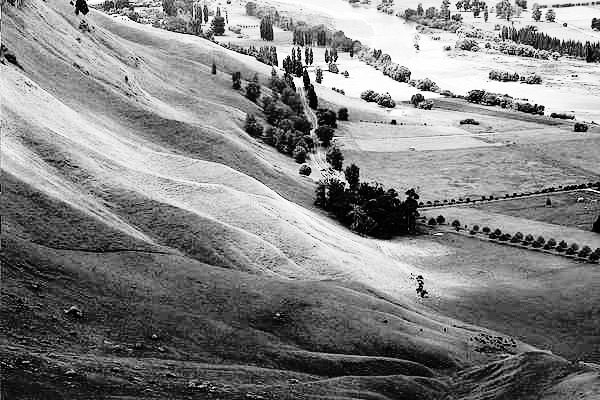

In [34]:
# %%timeit -r 5 -n 10
Image.fromarray(sequential(image,mask,256))